In [1]:
#import numpy, pandas and pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Meson masses
m_f2 = 1.2755; m_a2 = 1.3169; m_rho3 = 1.6888; m_omega3 = 1.667; m_f4 = 2.018; m_a4 = 1.967;
# Barnes et al results
ts = -np.array([0.002, 0.006, 0.012, 0.020, 0.028, 0.040, 0.056, 0.072, 0.090, 0.110, 0.140, 0.180, 0.220,
              0.260, 0.310, 0.370, 0.450, 0.550, 0.650, 0.750, 0.900, 1.1, 1.3])
js = np.array([0.491, 0.474, 0.474, 0.471, 0.453, 0.439, 0.422, 0.427, 0.393, 0.387, 0.344, 0.326, 0.294,
              0.248, 0.208, 0.184, 0.123, 0.040, 0.052, -0.087, -0.141, -0.270, -0.398])
js_errs = np.array([0.012, 0.011, 0.010, 0.009, 0.009, 0.008, 0.008, 0.008, 0.007, 0.008, 0.007, 0.008, 0.010,
                   0.012, 0.013, 0.020, 0.031, 0.067, 0.064, 0.071, 0.064, 0.080, 0.128])

def barnes_trajectory(ts):
    """
        returns the values of js given the t values as predicted by Barnes et al.
    """
    alpha0, alpha1, alpha2 = 0.481, 0.928, 0.205
    return alpha0 + alpha1 * ts + alpha2 * ts * ts

def plot_regge_trajectories(gluon_data, meson_data, n_gluon, n_meson, label = ""):
    """
        Plots the Regge trajectories present in the data frames
        gluon data and meson data. The number of trajectories
        to plot can be changed by the parameters n_gluon and n_meson.
        n_gluon and n_meson can not exceed the number of trajectories
        in the Pandas DataFrame objects gluon_data and meson_data.
        We assume the data frames have the following columns
        j t1(j) t2(j) ... tn(j) where n is the number of trajectories in the data.
    """
    n_gluon_trajs = len(gluon_data.columns) - 1
    n_meson_trajs = len(meson_data.columns) - 1
    plt.title("Regge trajectories " + label)
    plt.xlabel(r't ($\rm{GeV}^2$)')
    plt.xlim(-1, 6)
    plt.ylabel("j(t)")
    #plt.ylim(-1, 1)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.grid(True, which='both')
    # Plot the gluon Regge trajectories
    for i in range(n_gluon):
        plt.plot(gluon_data["t"+str(i+1)+"(j)"], gluon_data.j, label = "gluon n = " + str(i+1))
    # Plot the meson Regge trajectories
    for i in range(n_meson):
        plt.plot(meson_data["t"+str(i+1)+"(j)"], meson_data.j, label = "meson n = " + str(i+1))
    # plot the meson points
    if n_meson > 0:
        plt.plot(m_f2**2, 2, 'ko')
        plt.plot(m_a2**2, 2, 'ko')
        plt.plot(m_rho3**2, 3, 'ko')
        plt.plot(m_omega3**2, 3, 'ko')
        plt.plot(m_f4**2, 4, 'ko')
        plt.plot(m_a4**2, 4, 'ko')
        #plt.plot(ts, js, 'ko')
        #t = np.linspace(-1.3, 6, 1000)
        #plt.plot(t, barnes_trajectory(t), label = "Barnes et al.")
        #plt.plot(t, 0.5475 + 0.9 * t, label = "Donnachie & Landshoff")
    # Show and save the plots
    plt.legend()
    plt.savefig("regge_trajectories_"+label+".pdf")
    plt.show()

In [3]:
# Regge trajectory data for the Kernel Fixed fits
gluon_traj_meson_intercept = pd.read_csv("regge_trajectories_meson_intercept_gluon.txt", sep = '\t')
gluon_traj_meson_intercept_barnes = pd.read_csv("regge_trajectories_meson_intercept_barnes_gluon.txt", sep = '\t')
gluon_traj_meson_masses = pd.read_csv("regge_trajectories_meson_masses_gluon.txt", sep = '\t')
meson_traj_meson_intercept = pd.read_csv("regge_trajectories_meson_intercept_meson.txt", sep = '\t')
meson_traj_meson_masses = pd.read_csv("regge_trajectories_meson_masses_meson.txt", sep = '\t')
meson_traj_meson_intercept_barnes = pd.read_csv("regge_trajectories_meson_intercept_barnes_meson.txt", sep = '\t')

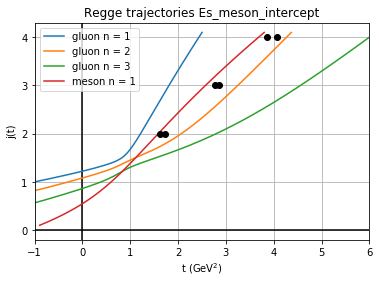

In [4]:
# Plot trajectories
plot_regge_trajectories(gluon_traj_meson_intercept, meson_traj_meson_intercept, 3, 1, label = "Es_meson_intercept")

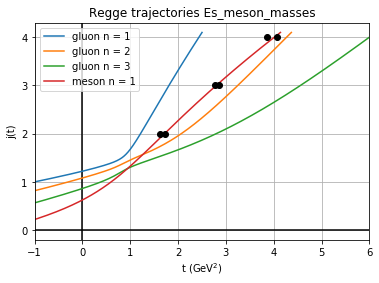

In [5]:
# Plot trajectories
plot_regge_trajectories(gluon_traj_meson_masses, meson_traj_meson_masses, 3, 1, label = "Es_meson_masses")

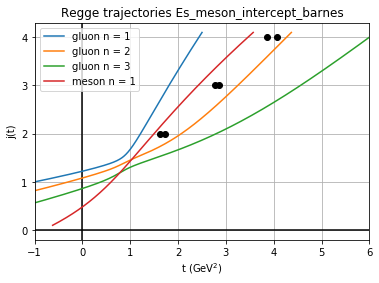

In [6]:
plot_regge_trajectories(gluon_traj_meson_intercept_barnes, meson_traj_meson_intercept_barnes, 3, 1, label = "Es_meson_intercept_barnes")